In [1]:
# import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
shapes = pd.DataFrame(pd.read_csv("../../data/00_gt/img_shapes.csv"))
shapes.describe()

,n_rows,n_cols
count,6000.000000,6000.000000
mean,284.506333,284.499000
std,344.463594,344.949885
min,34.000000,34.000000
25%,99.000000,99.000000
50%,170.000000,170.000000
75%,302.000000,301.000000
max,4340.000000,4340.000000


In [3]:
pts_train = pd.DataFrame(pd.read_csv("../../data/00_input/train/gt.csv"))
print(pts_train.shape)
pts_train.head()

(6000, 29)


,filename,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14
0,00000.jpg,51,51,127,60,169,65,203,52,68,...,193,84,156,144,92,174,140,180,168,179
1,00001.jpg,21,20,36,18,57,19,80,25,23,...,78,33,43,46,31,61,45,66,60,65
2,00002.jpg,23,116,39,83,47,57,56,19,36,...,62,31,91,86,106,122,115,100,121,81
3,00003.jpg,29,18,63,25,84,32,105,34,38,...,95,45,72,71,46,83,63,87,75,89
4,00004.jpg,31,53,76,44,107,38,136,33,40,...,129,49,111,105,72,137,106,132,126,121


In [4]:
pts_train.describe()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,56.459333,66.598833,110.719167,63.637833,167.651000,62.826333,224.374833,63.046000,70.865667,89.189333,...,212.852333,87.031833,139.590667,148.694833,103.980000,193.221000,143.064833,196.038167,181.503167,192.006833
std,76.591462,85.711368,139.110156,79.124858,205.865455,79.353946,276.309825,85.414432,90.243491,108.295989,...,259.340855,108.415066,171.496260,180.921144,125.688879,232.451605,174.729189,236.494077,221.262438,232.207589
min,0.000000,1.000000,7.000000,5.000000,16.000000,6.000000,14.000000,2.000000,6.000000,7.000000,...,23.000000,7.000000,14.000000,15.000000,9.000000,-11.000000,13.000000,-7.000000,19.000000,-2.000000
25%,18.000000,21.000000,38.000000,21.000000,58.000000,21.000000,77.000000,20.000000,24.000000,31.000000,...,74.000000,30.000000,49.000000,51.000000,36.000000,68.000000,50.000000,68.000000,63.000000,67.000000
50%,32.000000,38.000000,65.000000,37.000000,99.000000,37.000000,133.000000,35.000000,41.000000,52.000000,...,127.000000,51.000000,82.000000,88.000000,62.000000,115.000000,84.500000,117.000000,107.000000,114.000000
75%,59.000000,71.000000,117.000000,68.000000,177.000000,66.000000,238.000000,66.000000,74.000000,95.000000,...,224.000000,92.000000,147.000000,160.000000,110.000000,204.000000,151.000000,208.250000,191.000000,203.000000
max,995.000000,1115.000000,1726.000000,1107.000000,2389.000000,1033.000000,3306.000000,1041.000000,1044.000000,1353.000000,...,3127.000000,1167.000000,2225.000000,2501.000000,1495.000000,2919.000000,2330.000000,3001.000000,2993.000000,2829.000000


In [5]:
from skimage import io

filenames = pts_train.filename
imgs_train = [io.imread('../../data/00_input/train/images/' + filename) for filename in filenames]

In [6]:
pts_train.drop('filename', axis=1, inplace=True)

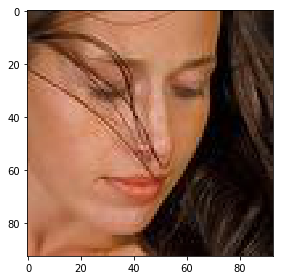

In [7]:
io.imshow(imgs_train[9]);

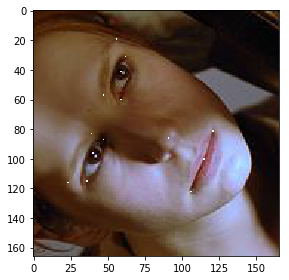

In [98]:
img = imgs_train[2].copy()
pts = pts_train.iloc[2].values.reshape(-1, 2)
for x, y in pts:
    img[y,x] = 255
io.imshow(img)

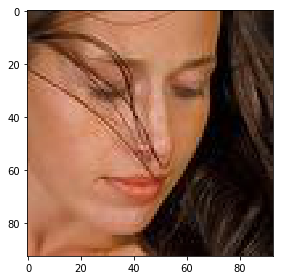

error: /io/opencv/modules/core/src/arithm.cpp:683: error: (-5) When the input arrays in add/subtract/multiply/divide functions have different types, the output array type must be explicitly specified in function arithm_op


In [89]:
img = imgs_train[9]

io.imshow(img)
plt.show()

def randomHueSaturationValue(image, hue_shift_limit=(-180, 180),
                             sat_shift_limit=(-255, 255),
                             val_shift_limit=(-255, 255), u=0.5):
    if np.random.random() < 1:
        h,w,c = img.shape # (768, 1024, 3)
        noise = np.random.randint(0,10,(h, w, c)) # design jitter/noise here
#         zitter = np.zeros_like(img)
#         zitter[:,:,1] = noise  
        image = cv2.add(img, noise)

    return image

io.imshow(randomHueSaturationValue(img,
                                               hue_shift_limit=(-1, 1),
                                               sat_shift_limit=(-1, 1),
                                               val_shift_limit=(-10, 10)))

In [5]:
from skimage import color, transform

NUM_PTS = 14
IMG_SIZE = 100

def train_generator()

def resize(img, pts=None):
    # Colorize image
    if len(img.shape) != 3:
        img = color.gray2rgb(img)
    
    transformation = transform.SimilarityTransform(scale=float(IMG_SIZE) / img.shape[0])
    img = transform.warp(img, inverse_map=transformation.inverse, output_shape=(IMG_SIZE, IMG_SIZE))
    if pts is None:
        return img, transformation
    for i in range(NUM_PTS):
        pts[2 * i + 1], pts[2 * i] = transformation([pts[2 * i + 1], pts[2 * i]])[0]
    return np.array(img), np.array(pts)
        
imgs_pts_resized = np.array(map(resize, imgs_train, pts_train))
imgs_train, pts_train = np.array(imgs_pts_resized[:, 0]), np.array(imgs_pts_resized[:, 1])

TypeError: Cannot cast array data from dtype('float64') to dtype('S32') according to the rule 'safe'